importing the required libraries
import the dataset as df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('googleplaystore.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Check and drop the null values present in the data

In [2]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [3]:
df.shape

(10841, 13)

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(9360, 13)

"Size" column contains string "varies with device",so drop those rows

In [6]:
df = df[-df["Size"].str.contains("Var")]

In [7]:
df.shape

(7723, 13)

"Size" column contains M , k and + sign at the end, so remove those and store it in New column as "SizeNum"

In [8]:
df.loc[:,"SizeNum"] = df["Size"].str.rstrip("Mk+")

In [9]:
df["SizeNum"]

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10833    619
10834    2.6
10836     53
10837    3.6
10840     19
Name: SizeNum, Length: 7723, dtype: object

convert the datatype of "SizeNum" column to float from string

In [10]:
df["SizeNum"] = df["SizeNum"].astype(float)

In [11]:
df["SizeNum"].dtype

dtype('float64')

"SizeNum" column has sizes in both MB and kb so wherever M is present multiply by 1000

In [12]:
df["SizeNum"]=np.where(df["Size"].str.contains("M"),df["SizeNum"]*1000,df["SizeNum"])

Now "SizeNum" and "Size" columns represent same entity, so replace values in "Size" by "SizeNum" and drop "SizeNum" Column.

In [13]:
df["Size"]=df["SizeNum"]
df.drop("SizeNum",axis=1,inplace=True)

convert the datatype of "Reviews" column to float from string

In [14]:
df["Reviews"]=df["Reviews"].astype(float)

"Installs" column contains ',' & '+' sign , so remove those 

In [15]:
df["Installs"]=df["Installs"].str.replace("+","")
df["Installs"]=df["Installs"].str.replace(",","")

C:\Users\SACHIN~1\AppData\Local\Temp/ipykernel_17604/2249835679.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Installs"]=df["Installs"].str.replace("+","")


convert the datatype of "Installs" column to float from string

In [16]:
df["Installs"]=df["Installs"].astype(float)

"Price" column contains '$' sign , so remove those and convert the datatype to float from string

In [17]:
df["Price"]=df["Price"].str.replace("$","")

C:\Users\SACHIN~1\AppData\Local\Temp/ipykernel_17604/2278851203.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"]=df["Price"].str.replace("$","")


In [18]:
df["Price"]=df["Price"].astype(float)

check whether any app has rating less than 1 and more than 5(No apps found)

In [19]:
df[((df["Rating"]<1) & (df["Rating"]>5))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


check the for which No. of Reviews is more than installs, and drop them

In [21]:
df.drop(df.index[df["Reviews"]>df["Installs"]],inplace=True)

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


check whether any app is listed free and has price more than zero(no apps found)

In [23]:
df[(df["Type"]=="Free") & (df["Price"]>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Plotting boxplot for "price"  

C:\Users\Sachin Shetty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

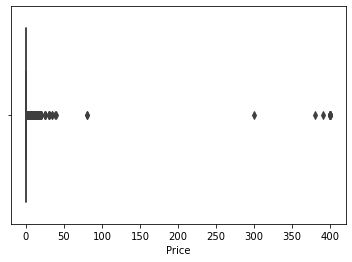

In [24]:
import seaborn as sns
sns.boxplot(df["Price"])

Check for outliers by setting the limit to (mean+3* Standard Deviation) and drop those values

In [33]:
mean=df["Price"].mean()
std=df["Price"].std()
outlier=mean + 3*std

In [48]:
df.drop(df.index[df["Price"]>outlier],inplace=True)

plotting boxplot for "Reviews" and drop the rows which have "Reviews" more than 2000000

<AxesSubplot:xlabel='Reviews'>

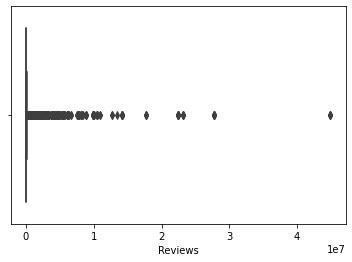

In [50]:
sns.boxplot(df["Reviews"])

In [58]:
df.drop(df.index[df["Reviews"]>2000000],inplace=True)

In [59]:
df.shape

(7481, 13)

In [26]:
import warnings
warnings.filterwarnings('ignore')

plotting boxplot for "Installs" and calculate percentiles – 10, 25, 50, 70, 90, 95, 99

drop "Installs" which has values more than 10000000.0(3*std)

<AxesSubplot:xlabel='Installs'>

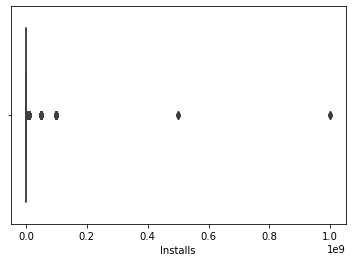

In [60]:
sns.boxplot(df["Installs"])

In [61]:
np.percentile(df["Installs"],10)

1000.0

In [62]:
np.percentile(df["Installs"],25)

10000.0

In [63]:
np.percentile(df["Installs"],50)

100000.0

In [64]:
np.percentile(df["Installs"],70)

1000000.0

In [65]:
np.percentile(df["Installs"],90)

10000000.0

In [69]:
np.percentile(df["Installs"],95)

10000000.0

In [68]:
np.percentile(df["Installs"],99)

50000000.0

In [77]:
df.drop(df.index[df["Installs"]>10000000.0],inplace=True)

In [78]:
df.shape

(7305, 13)

Plot histogram for "Rating", can be found most of the ratings are between 4 to 5

<AxesSubplot:xlabel='Rating', ylabel='Count'>

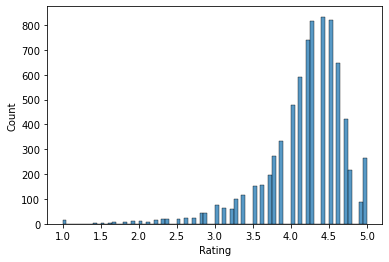

In [27]:
sns.histplot(df["Rating"])

Plot histogram for "Size", can be found most of the app size is less than 20000kb

<AxesSubplot:xlabel='Size', ylabel='Count'>

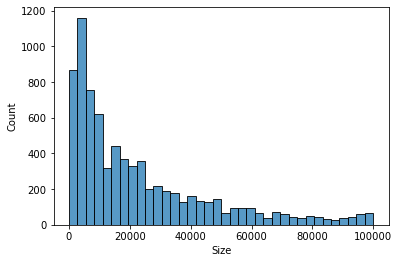

In [28]:
sns.histplot(df["Size"])

scatterplot for Price & Rating, No proper correlation could be found between these two features

In [ ]:
Most of the apps get ratings more than 3

<AxesSubplot:xlabel='Price', ylabel='Rating'>

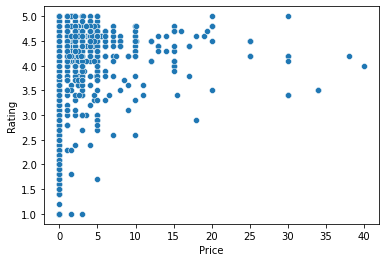

In [80]:
sns.scatterplot(df["Price"],df["Rating"],data=df)

scatterplot for Size & Rating, No proper correlation could be found between these two features

<AxesSubplot:xlabel='Size', ylabel='Rating'>

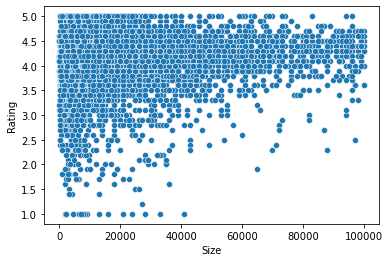

In [81]:
sns.scatterplot(df["Size"],df["Rating"],data=df)

scatterplot for Reviews & Rating, No proper correlation could be found between these two features

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

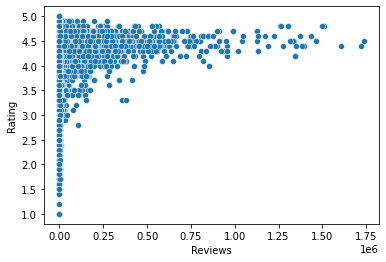

In [82]:
sns.scatterplot(df["Reviews"],df["Rating"],data=df)

Box plot for Rating vs Content Rating

Adults only 18+ content have the high ratings and also more concentrated without outliers

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

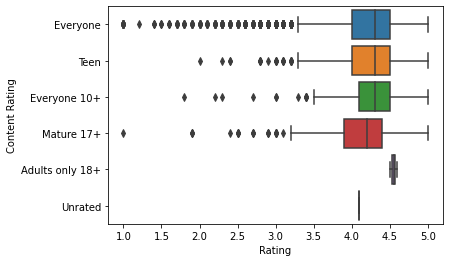

In [83]:
sns.boxplot(df["Rating"],df["Content Rating"],data=df)

Box plot for Rating vs Category

EVENTS and HEALTH_AND_FITNESS have highest ratings

<AxesSubplot:xlabel='Rating', ylabel='Category'>

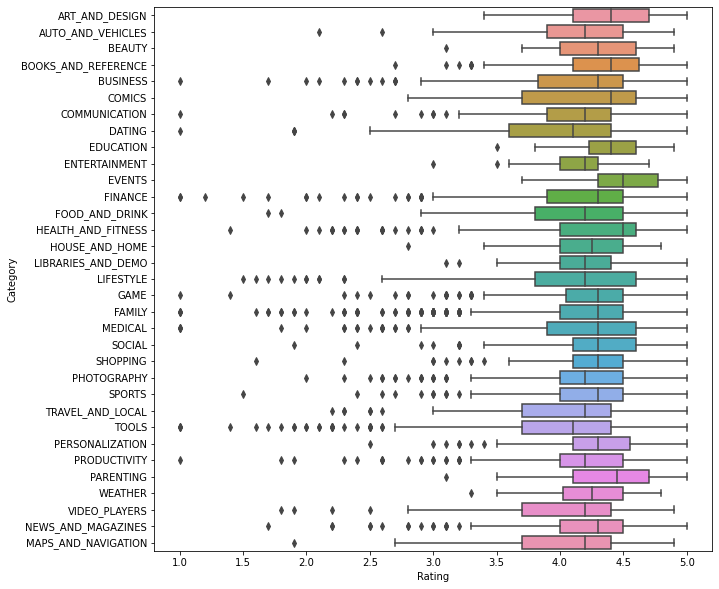

In [86]:
plt.figure(figsize=(10,10))
sns.boxplot(df["Rating"],df["Category"],data=df)

make a copy of dataset as inp1

if we plot distplot for Reviews and Installs, they are skewed towards one side so apply log transformation

In [87]:
inp1 = df.copy()

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

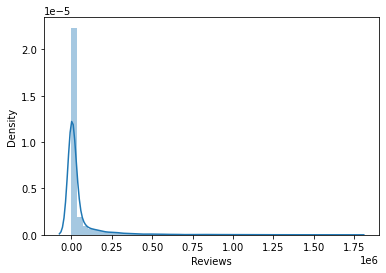

In [88]:
sns.distplot(inp1["Reviews"])

In [89]:
inp1["Reviews"]=inp1["Reviews"].apply(np.log1p)

In [91]:
inp1["Installs"]=inp1["Installs"].apply(np.log1p)

Drop columns 'App', 'Last Updated', 'Current Ver','Android Ver', as they are not required

In [93]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [94]:
inp1.drop(['App', 'Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

now Get dummy columns for Category, Genres, and Content Rating by using pd.get_dummies

In [96]:
inp2=pd.get_dummies(inp1)

In [99]:
inp2.head(2)

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


define X as features and y as target 

In [101]:
X = inp2.iloc[:,1:]
y=inp2.iloc[:,0]

split the data into x_train,x_test,y_train,y_test with 70 to 30 ratio

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

import LinearRegression and apply linearRegression on x_train,y_train

In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [107]:
lr.fit(x_train,y_train)

LinearRegression()

Predict the y values by using x_test

In [108]:
y_pred = lr.predict(x_test)

calculate r2 score by using y_test and y_pred values

In [109]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.15291623766521423